In [1]:
!gdown --id  1lO6q4kX3dNxpos-ktAqXOBV29n5t4jat

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lO6q4kX3dNxpos-ktAqXOBV29n5t4jat
To: /content/TASK6.zip
100% 186k/186k [00:00<00:00, 71.1MB/s]


In [2]:
!unzip /content/TASK6.zip

Archive:  /content/TASK6.zip
  inflating: TASK6 GLASSES/glass_image.jpg  
  inflating: TASK6 GLASSES/glass_on_face.py  
  inflating: TASK6 GLASSES/h.png     
  inflating: TASK6 GLASSES/kl.jpg    
  inflating: TASK6 GLASSES/shahsparx.jpg  


In [3]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

--2023-07-25 11:59:29--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2023-07-25 11:59:29 (19.2 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2023-07-25 11:59:30--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercont

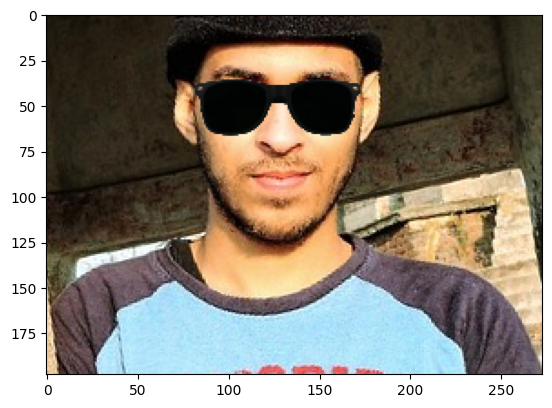

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

# read both the images of the face and the glasses

##RENAME TASK6 GLASSES FOLDER TO TASK 6
image = cv2.imread('/content/TASK6/shahsparx.jpg')
glass_img = cv2.imread('/content/TASK6/glass_image.jpg')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

centers = []
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# iterating over the face detected
for (x, y, w, h) in faces:

    # create two Regions of Interest.
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    # Store the coordinates of eyes in the image to the 'center' array
    for (ex, ey, ew, eh) in eyes:
        centers.append((x + int(ex + 0.5 * ew), y + int(ey + 0.5 * eh)))

if len(centers) > 0:
    # change the given value of 2.15 according to the size of the detected face
    glasses_width = 2.16 * abs(centers[1][0] - centers[0][0])
    overlay_img = np.ones(image.shape, np.uint8) * 255
    h, w = glass_img.shape[:2]
    scaling_factor = glasses_width / w

    overlay_glasses = cv2.resize(glass_img, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)

    x = centers[0][0] if centers[0][0] < centers[1][0] else centers[1][0]

    # The x and y variables below depend upon the size of the detected face.
    x -= 0.26 * overlay_glasses.shape[1]
    y += 0.85 * overlay_glasses.shape[0]

    # Slice the height, width of the overlay image.
    h, w = overlay_glasses.shape[:2]
    overlay_img[int(y):int(y + h), int(x):int(x + w)] = overlay_glasses

    # Create a mask and generate it's inverse.
    gray_glasses = cv2.cvtColor(overlay_img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(gray_glasses, 110, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    temp = cv2.bitwise_and(image, image, mask=mask)

    temp2 = cv2.bitwise_and(overlay_img, overlay_img, mask=mask_inv)
    final_img = cv2.add(temp, temp2)

    # imS = cv2.resize(final_img, (1366, 768))
    imDlib = cv2.cvtColor(final_img,cv2.COLOR_BGR2RGB)
    #imDlib = cv2.resize(imDlib ,(417,626))
    plt.imshow(imDlib)

    cv2.waitKey()
    cv2.destroyAllWindows()


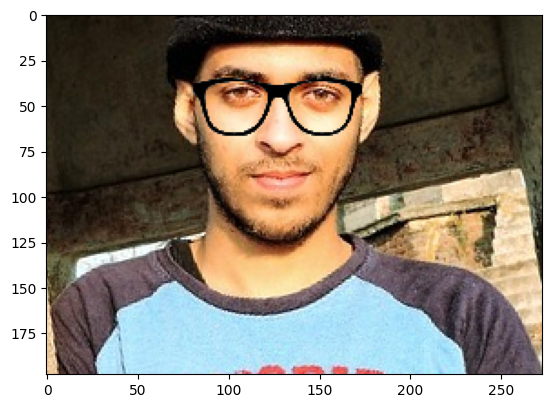

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

# read both the images of the face and the glasses

##RENAME TASK6 GLASSES FOLDER TO TASK 6
image = cv2.imread('/content/TASK6/shahsparx.jpg')
glass_img = cv2.imread('/content/TASK6/h.png')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

centers = []
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# iterating over the face detected
for (x, y, w, h) in faces:

    # create two Regions of Interest.
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image[y:y + h, x:x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    # Store the coordinates of eyes in the image to the 'center' array
    for (ex, ey, ew, eh) in eyes:
        centers.append((x + int(ex + 0.5 * ew), y + int(ey + 0.5 * eh)))

if len(centers) > 0:
    # change the given value of 2.15 according to the size of the detected face
    glasses_width = 2.16 * abs(centers[1][0] - centers[0][0])
    overlay_img = np.ones(image.shape, np.uint8) * 255
    h, w = glass_img.shape[:2]
    scaling_factor = glasses_width / w

    overlay_glasses = cv2.resize(glass_img, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)

    x = centers[0][0] if centers[0][0] < centers[1][0] else centers[1][0]

    # The x and y variables below depend upon the size of the detected face.
    x -= 0.26 * overlay_glasses.shape[1]
    y += 0.85 * overlay_glasses.shape[0]

    # Slice the height, width of the overlay image.
    h, w = overlay_glasses.shape[:2]
    overlay_img[int(y):int(y + h), int(x):int(x + w)] = overlay_glasses

    # Create a mask and generate it's inverse.
    gray_glasses = cv2.cvtColor(overlay_img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(gray_glasses, 110, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    temp = cv2.bitwise_and(image, image, mask=mask)

    temp2 = cv2.bitwise_and(overlay_img, overlay_img, mask=mask_inv)
    final_img = cv2.add(temp, temp2)

    # imS = cv2.resize(final_img, (1366, 768))
    imDlib = cv2.cvtColor(final_img,cv2.COLOR_BGR2RGB)
    #imDlib = cv2.resize(imDlib ,(417,626))
    plt.imshow(imDlib)

    cv2.waitKey()
    cv2.destroyAllWindows()